In [53]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.stats import norm

In [54]:
#read census file
census = pd.read_csv("census_data_complete.csv")
census

,Zipcode,Population,Household Income,Median Age,Median Male Age,Median Female Age,Per Capita Income,lat,lng,city,state_id,state_name
0,601,17242.0,13092.0,40.5,39.5,41.3,6999.0,NaN,NaN,NaN,NaN,NaN
1,602,38442.0,16358.0,42.3,41.9,42.8,9277.0,NaN,NaN,NaN,NaN,NaN
2,603,48814.0,16603.0,41.1,39.1,42.9,11307.0,NaN,NaN,NaN,NaN,NaN
3,606,6437.0,12832.0,43.3,43.2,43.4,5943.0,NaN,NaN,NaN,NaN,NaN
4,610,27073.0,19309.0,42.1,40.4,44.2,10220.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
33115,87515,363.0,NaN,44.2,47.8,22.9,NaN,36.50231,-106.37718,Canjilon,NM,New Mexico
33116,87518,9.0,NaN,-666666666.0,-666666666.0,-666666666.0,NaN,36.50733,-106.56265,Cebolla,NM,New Mexico
33117,87511,2896.0,NaN,36.0,44.3,27.8,NaN,36.10226,-105.92584,Alcalde,NM,New Mexico
33118,87578,245.0,NaN,48.0,63.0,39.6,NaN,36.03903,-105.76530,Truchas,NM,New Mexico


In [55]:
#cleanup the csv
#fill blank cells with NA and then drop all rows with NA values
census = census.replace('', np.nan)

In [56]:
#drop all NA rows
census = census.dropna(how="any")

In [57]:
#remove rows that contain the value -666666666.0
indexnames = census[ census['Household Income'] == -666666666.0].index
census.drop(indexnames, inplace=True)
census

,Zipcode,Population,Household Income,Median Age,Median Male Age,Median Female Age,Per Capita Income,lat,lng,city,state_id,state_name
2558,10001,22924.0,88526.0,36.7,40.1,34.3,84765.0,40.75061,-73.99716,New York,NY,New York
2559,10002,74993.0,35859.0,43.6,40.7,46.0,32694.0,40.71586,-73.98613,New York,NY,New York
2560,10003,54682.0,112131.0,32.3,33.3,30.7,92781.0,40.73180,-73.98911,New York,NY,New York
2561,10004,3028.0,157645.0,37.1,38.3,37.0,122165.0,40.69465,-74.02106,New York,NY,New York
2562,10005,8831.0,173333.0,30.1,30.4,29.9,106702.0,40.70616,-74.00907,New York,NY,New York
...,...,...,...,...,...,...,...,...,...,...,...,...
33078,99921,1986.0,58571.0,41.4,45.5,38.2,34414.0,55.45479,-132.77209,Craig,AK,Alaska
33079,99922,330.0,34028.0,39.5,39.4,39.8,18213.0,55.30211,-133.03248,Hydaburg,AK,Alaska
33081,99925,927.0,57375.0,43.6,42.0,45.1,25840.0,55.55767,-132.97627,Klawock,AK,Alaska
33082,99926,1635.0,53409.0,34.5,34.6,34.3,22453.0,55.12617,-131.48928,Metlakatla,AK,Alaska


In [58]:
#display statistical characteristics of the data
census.describe().round(2)

,Zipcode,Population,Household Income,Median Age,Median Male Age,Median Female Age,Per Capita Income,lat,lng
count,28420.00,28420.00,28420.00,28420.00,2.842000e+04,2.842000e+04,28420.00,28420.00,28420.00
mean,53408.85,10499.85,57598.15,42.29,-8.678922e+05,-9.851786e+05,29407.55,38.67,-92.57
std,25076.94,15037.81,23671.22,8.34,2.403933e+07,2.560990e+07,12624.90,5.29,14.53
min,10001.00,10.00,2499.00,5.40,-6.666667e+08,-6.666667e+08,1123.00,19.07,-176.63
25%,32116.25,895.00,42500.00,36.80,3.560000e+01,3.750000e+01,22236.75,35.11,-97.69
50%,53561.50,3195.00,53170.00,41.60,4.040000e+01,4.280000e+01,26976.50,39.11,-89.58
75%,73159.25,14724.75,66349.25,46.90,4.602000e+01,4.830000e+01,33074.50,41.88,-81.97
max,99929.00,122814.00,250001.00,86.00,9.100000e+01,9.010000e+01,279429.00,71.27,-71.95


In [62]:
#Calculate zscores for household income, age and population
#target group for age is 30, while for household income and population is the mean
#Add columns for ssqd and zscores

ssqd_age = (census["Median Age"] - 30)**2
census["Age_sqd"] = ssqd_age
ssqd_pop = (census["Population"] - census["Population"].mean())**2
census["Popn_sqd"] = ssqd_pop #.map('{:.2f}'.format)
ssqd_inc = (census["Household Income"] - census["Household Income"].mean())**2
census["Income_sqd"] = ssqd_inc #.map('{:.2f}'.format)
census

,Zipcode,Population,Household Income,Median Age,Median Male Age,Median Female Age,Per Capita Income,lat,lng,city,state_id,state_name,Age_sqd,Popn_sqd,Income_sqd
2558,10001,22924.0,88526.0,36.7,40.1,34.3,84765.0,40.75061,-73.99716,New York,NY,New York,44.89,1.543594e+08,9.565317e+08
2559,10002,74993.0,35859.0,43.6,40.7,46.0,32694.0,40.71586,-73.98613,New York,NY,New York,184.96,4.159366e+09,4.725908e+08
2560,10003,54682.0,112131.0,32.3,33.3,30.7,92781.0,40.73180,-73.98911,New York,NY,New York,5.29,1.952062e+09,2.973831e+09
2561,10004,3028.0,157645.0,37.1,38.3,37.0,122165.0,40.69465,-74.02106,New York,NY,New York,50.41,5.582859e+07,1.000937e+10
2562,10005,8831.0,173333.0,30.1,30.4,29.9,106702.0,40.70616,-74.00907,New York,NY,New York,0.01,2.785072e+06,1.339455e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33078,99921,1986.0,58571.0,41.4,45.5,38.2,34414.0,55.45479,-132.77209,Craig,AK,Alaska,129.96,7.248570e+07,9.464321e+05
33079,99922,330.0,34028.0,39.5,39.4,39.8,18213.0,55.30211,-133.03248,Hydaburg,AK,Alaska,90.25,1.034259e+08,5.555521e+08
33081,99925,927.0,57375.0,43.6,42.0,45.1,25840.0,55.55767,-132.97627,Klawock,AK,Alaska,184.96,9.163952e+07,4.979707e+04
33082,99926,1635.0,53409.0,34.5,34.6,34.3,22453.0,55.12617,-131.48928,Metlakatla,AK,Alaska,20.25,7.858563e+07,1.754900e+07


In [59]:
#census.dtypes
# census["Popn_sqd"]
# census["Income_sqd"]

In [63]:
variance_age = census["Age_sqd"].sum()/len(census)
variance_pop = census["Popn_sqd"].sum()/len(census)
variance_inc = census["Income_sqd"].sum()/len(census)

In [64]:
sd_age = math.sqrt(variance_age)
sd_pop = math.sqrt(variance_pop)
sd_inc = math.sqrt(variance_inc)

In [65]:
census["zscore_age"] = 1-abs((census["Median Age"] - 30)/sd_age)
census["zscore_pop"] = 1-abs((census["Population"] - census["Population"].mean())/sd_pop)
census["zscore_inc"] = 1-abs((census["Household Income"] - census["Household Income"].mean())/sd_inc)

In [69]:
census.drop(columns={"state_name", "Median Male Age", "Median Female Age"})

KeyError: "['Median Male Age' 'Median Female Age' 'state_name'] not found in axis"

In [70]:
#save the new csv
census.to_csv("census_zscores.csv", index=False, header=True)

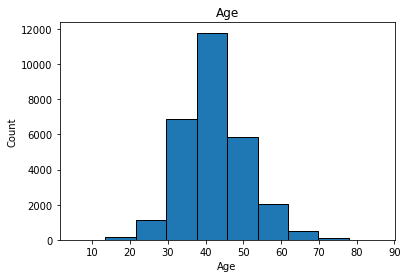

In [27]:
#Visualizations
#make histograms of age, inc, popn and try to superimpose normal distrin curve
plt.hist(census["Median Age"], edgecolor = 'black') # plotting histogram 
#plt.plot(census["Median Age"], normal_distribution_curve, color = "orange")  
plt.title("Age") #Assign title 
plt.xlabel("Age") #Assign x label 
plt.ylabel("Count") #Assign y label 
#superimposing normal curve
# avg_age = np.mean(census["Median Age"])
# sd_age = np.std(census["Median Age"])
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax)
# p = norm.pdf(x, avg_age, sd_age)
# plt.plot(x, p, 'k', linewidth=2)
#plt.plot(census["Median Age"], norm.pdf(census["Median Age"],0,2))

plt.show()

Text(0, 0.5, 'Count')

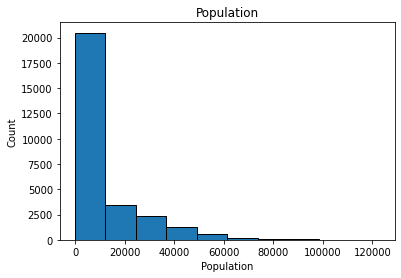

In [28]:
plt.hist(census["Population"], edgecolor = 'black')
plt.title("Population") #Assign title 
plt.xlabel("Population") #Assign x label 
plt.ylabel("Count") #Assign y label 
#plt.plot(census["Population"], norm.pdf(census["Population"],0,2))

Text(0, 0.5, 'Count')

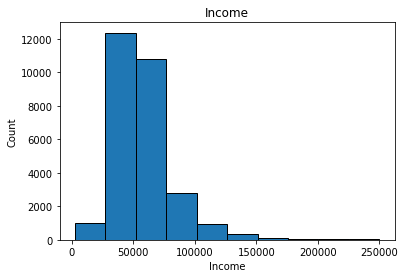

In [21]:
plt.hist(census["Household Income"], edgecolor = 'black')
plt.title("Income") #Assign title 
plt.xlabel("Income") #Assign x label 
plt.ylabel("Count") #Assign y label 